## CUSTOMER CHURN PREDICTION PROJECT

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [91]:
file_path = r"C:\Users\ChanakyaY\Downloads\Churn_Modelling.csv"
df = pd.read_csv(file_path)

In [93]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [95]:
df.shape

(10000, 14)

In [97]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [103]:
df.describe() # statistical date

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [105]:
df1 = df.copy()
df =df.drop(columns = ['Surname','Geography','Gender'])
df

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [107]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<Axes: >

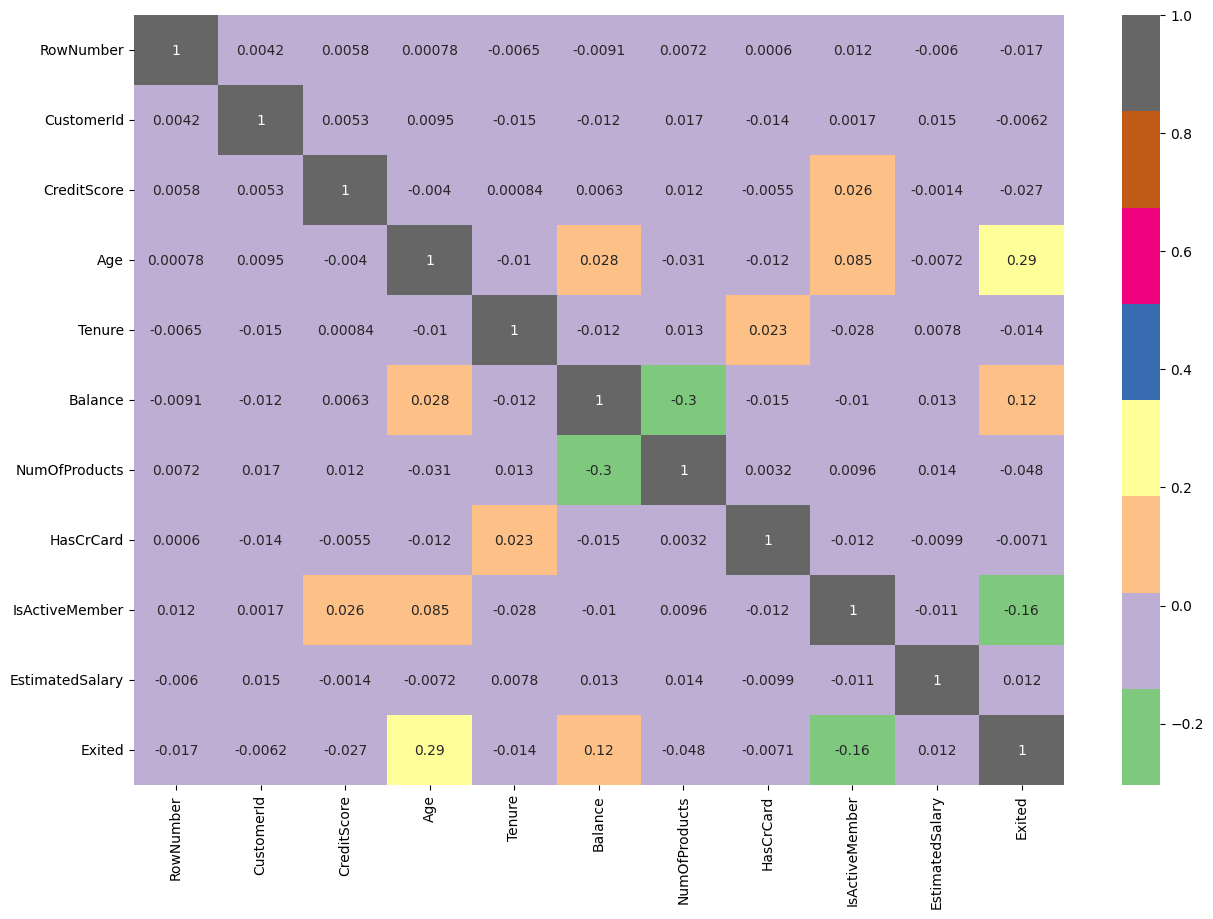

In [109]:
plt.figure(figsize = (15,10))
corr = df.corr()
sns.heatmap(corr,annot= True , cmap = "Accent")

In [110]:
features =corr['Exited'].sort_values(ascending = False)[1:]

In [113]:
features.index # x-axis

Index(['Age', 'Balance', 'EstimatedSalary', 'CustomerId', 'HasCrCard',
       'Tenure', 'RowNumber', 'CreditScore', 'NumOfProducts',
       'IsActiveMember'],
      dtype='object')

In [115]:
features.values # y-axis

array([ 0.28532304,  0.11853277,  0.01209686, -0.00624799, -0.00713777,
       -0.01400061, -0.01657137, -0.02709354, -0.04781986, -0.15612828])

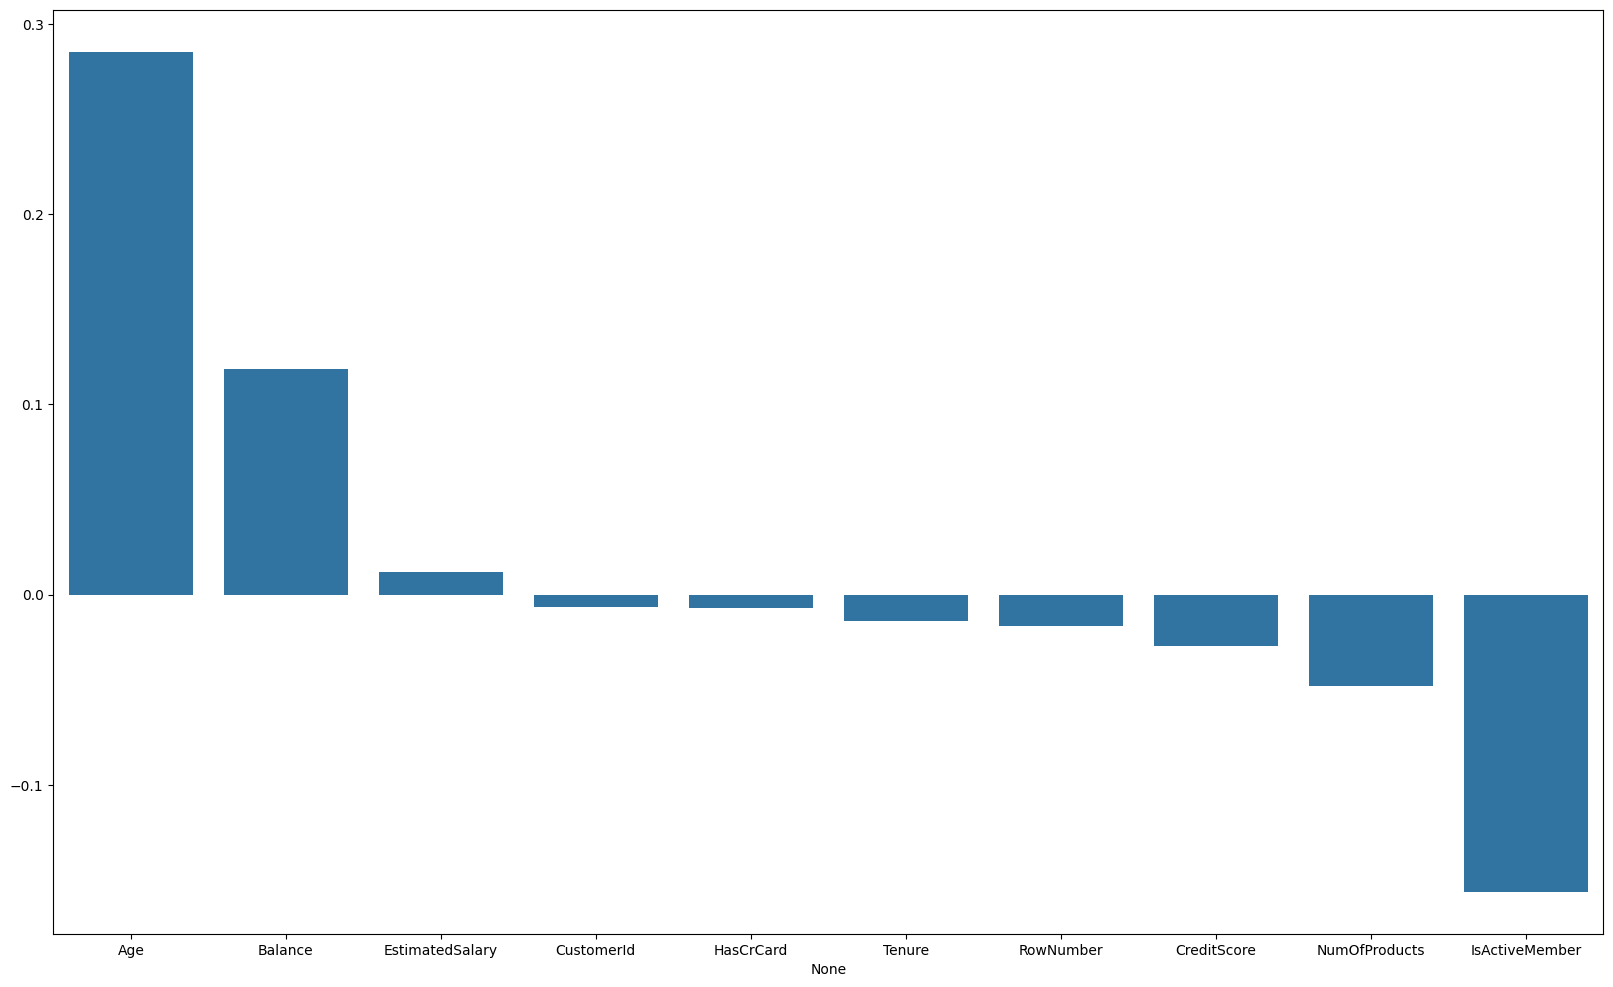

In [117]:
plt.figure(figsize =(20,12) )
sns.barplot(x= features.index, y = features.values)
plt.show()

Exited
0    7963
1    2037
Name: count, dtype: int64


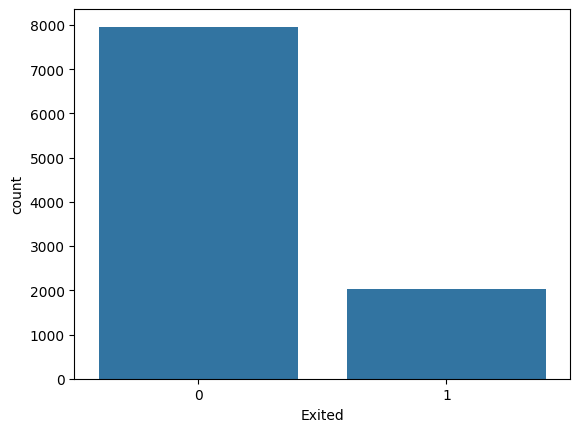

In [118]:
# now i want to know how many have exited the bank
print(df['Exited'].value_counts())
sns.countplot(x='Exited',data = df)
plt.show()

## Finding Relations

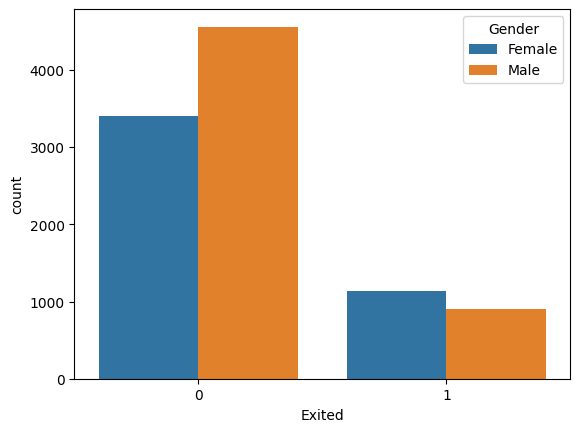

In [122]:
sns.countplot(x = 'Exited',data = df1 , hue = 'Gender')
plt.show()

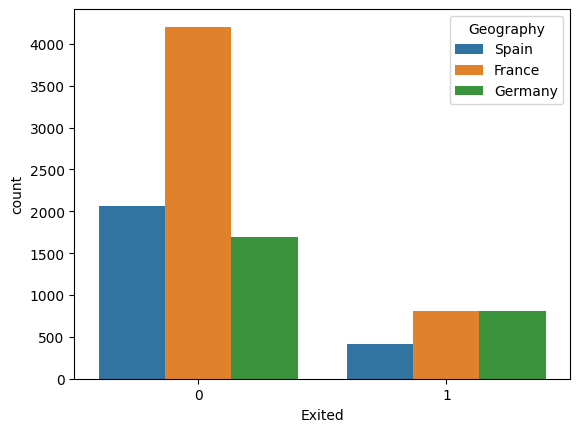

In [124]:
sns.countplot(x = 'Exited',data = df1 , hue = 'Geography')
plt.show()

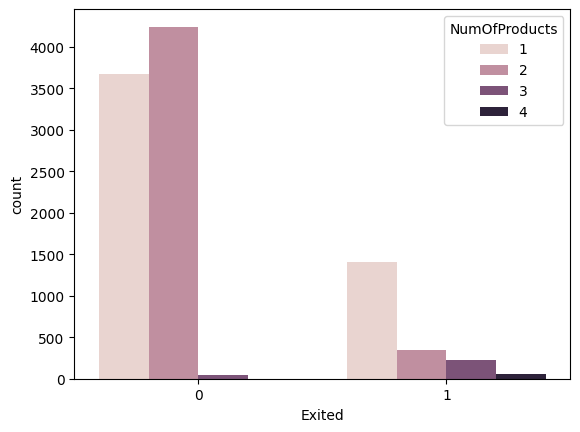

In [126]:
sns.countplot(x = 'Exited',data = df1 , hue = 'NumOfProducts')
plt.show()

C:\Users\ChanakyaY\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\ChanakyaY\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args,

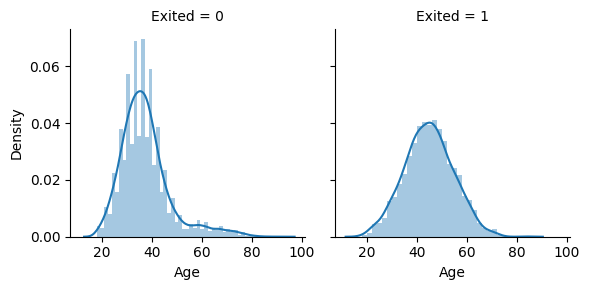

In [134]:
sns.FacetGrid(df1,col = 'Exited').map(sns.distplot,'Age')
plt.show()

In [257]:
df1 = df1.drop(columns = ['RowNumber','CustomerId','Surname'])

In [259]:
df1['Geography']  = df1['Geography'].astype('category').cat.codes
df1.loc[:, 'Gender'] = np.where(df1['Gender'] == 'Male', 1, 0)
df1
df1['Gender'].value_counts()

Gender
0    10000
Name: count, dtype: int64

In [261]:
df1.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [263]:
X = df1.drop(columns = ['Exited']).values
y = df1['Exited'].values

In [265]:
from sklearn.model_selection import train_test_split

In [267]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2,random_state =0)

In [269]:
X_train

array([[6.6700000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.6383064e+05],
       [4.2700000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 5.7098000e+04],
       [5.3500000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.8563076e+05],
       ...,
       [7.3800000e+02, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.8142987e+05],
       [5.9000000e+02, 2.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 1.4875016e+05],
       [6.2300000e+02, 1.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 1.1885526e+05]])

In [275]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score

In [277]:
from xgboost import XGBClassifier

In [279]:
basic_model = XGBClassifier()
basic_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [281]:
def evaluate_model(model):
    print('Training accuracy',model.score(X_train,y_train))
    print('Testing accuracy',model.score(X_test,y_test))
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    
    print("F1 score:",f1_score(y_test,y_pred))
    

In [285]:
evaluate_model(basic_model)

Training accuracy 0.951625
Testing accuracy 0.8515
[[1498   97]
 [ 200  205]]
F1 score: 0.57991513437058


## we can improve by hyperparameter tuning

In [290]:
from sklearn.model_selection import GridSearchCV

In [292]:
xgb_params = {
    'n_estimators':[100,200],
    'max_depth':[4,5]
        
}

In [294]:
grid = GridSearchCV(XGBClassifier(),param_grid = xgb_params,scoring = 'accuracy',cv = 10)

In [308]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5], 'n_estimators': [100, 200]},
             scoring='accuracy')

In [310]:
print("best score",grid.best_score_)

best score 0.85725


In [312]:
print('best params',grid.best_params_)

best params {'max_depth': 4, 'n_estimators': 100}


In [314]:
model_1 = XGBClassifier(max_depth = 4)
model_1.fit(X_train , y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [316]:
evaluate_model(model_1)

Training accuracy 0.902
Testing accuracy 0.8625
[[1516   79]
 [ 196  209]]
F1 score: 0.6031746031746031


In [318]:
from sklearn.ensemble import GradientBoostingClassifier

In [320]:
model_2 = GradientBoostingClassifier(n_estimators = 500)
model_2.fit(X_train , y_train)


GradientBoostingClassifier(n_estimators=500)

In [322]:
evaluate_model(model_2)

Training accuracy 0.90225
Testing accuracy 0.8605
[[1512   83]
 [ 196  209]]
F1 score: 0.599713055954089
